# 宏观经济数据获取

初始宏观数据获取：https://uestc.feishu.cn/wiki/DrMYw98b2iVGRbkBfH3cGzeTnoe#EdkHdlhkkoahbEx18ZxcszeRnzb

In [2]:
import pandas as pd

In [3]:
macro = pd.read_csv('../data/macro.csv')
macro.date

0       2005-01-01
1       2005-01-02
2       2005-01-03
3       2005-01-04
4       2005-01-05
           ...    
7026    2024-03-28
7027    2024-03-29
7028    2024-03-30
7029    2024-03-31
7030    2024-04-01
Name: date, Length: 7031, dtype: object

In [4]:

# date列转换为datetime类型,作为索引
macro['date'] = pd.to_datetime(macro['date'])
macro.set_index('date', inplace=True)
#去除 Unnamed: 0  
macro.drop(columns='Unnamed: 0', inplace=True)
# 去除 'instrument`
macro.drop(columns='instrument', inplace=True)
macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7031 entries, 2005-01-01 to 2024-04-01
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bdi                       7031 non-null   float64
 1   chibor_1M                 3396 non-null   float64
 2   chibor_1Y                 3386 non-null   float64
 3   chibor_1w                 3396 non-null   float64
 4   chibor_2M                 3395 non-null   float64
 5   chibor_2w                 3396 non-null   float64
 6   chibor_3M                 3396 non-null   float64
 7   chibor_3w                 3396 non-null   float64
 8   chibor_4M                 3396 non-null   float64
 9   chibor_6M                 3395 non-null   float64
 10  chibor_9M                 3393 non-null   float64
 11  chibor_on                 3396 non-null   float64
 12  cpi                       7031 non-null   float64
 13  end_investor_num          3252 non-null   flo

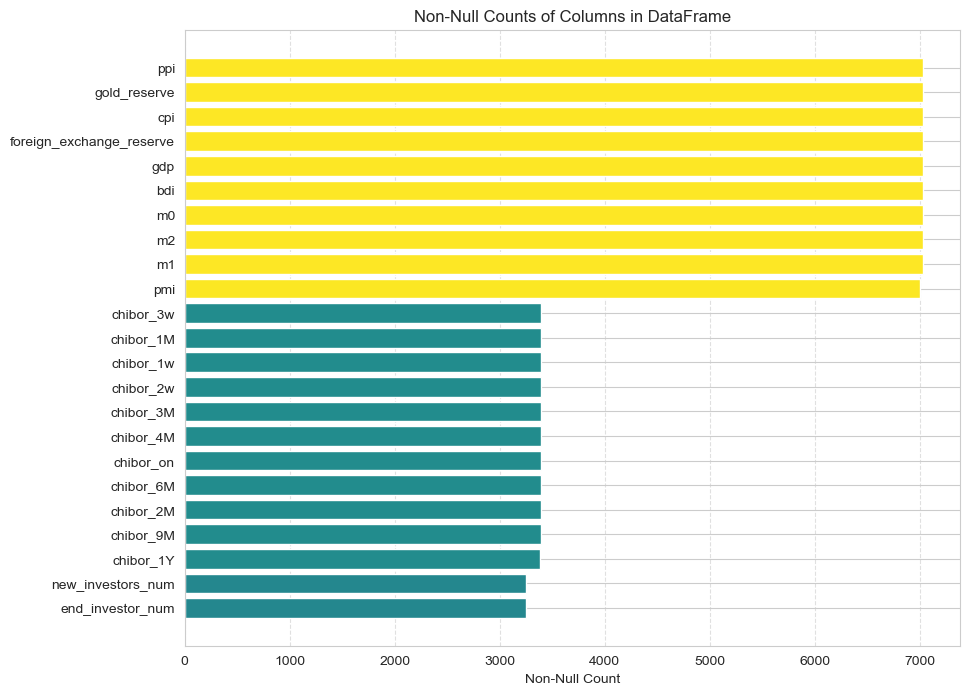

In [11]:
import matplotlib.pyplot as plt
# 用横着的直方图，可视化各列的元素个数，长度不同，颜色不同

df = macro

# 创建一个数据字典，包含列名和非空计数
data = {
    'Column': df.columns,
    'Non-Null Count': df.count()
}

# 转换为 DataFrame
count_df = pd.DataFrame(data)

# 对非空计数进行排序，以便更好的可视化效果
count_df_sorted = count_df.sort_values('Non-Null Count', ascending=True)

# 使用归一化的值来获取颜色映射
colors = plt.cm.viridis(count_df_sorted['Non-Null Count'] / count_df_sorted['Non-Null Count'].max())

# 绘制横向直方图
plt.figure(figsize=(10, 8))
plt.barh(count_df_sorted['Column'], count_df_sorted['Non-Null Count'], color=colors)
plt.xlabel('Non-Null Count')
plt.title('Non-Null Counts of Columns in DataFrame')
plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.show()



In [33]:


# 将数据少于7000的列名保存
columns = macro.columns[macro.count() < 7000]

# 删除数据少于7000的列
macro.drop(columns=columns, inplace=True)
macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7031 entries, 2005-01-01 to 2024-04-01
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bdi                       7031 non-null   float64
 1   chibor_1M                 3396 non-null   float64
 2   chibor_1Y                 3386 non-null   float64
 3   chibor_1w                 3396 non-null   float64
 4   chibor_2M                 3395 non-null   float64
 5   chibor_2w                 3396 non-null   float64
 6   chibor_3M                 3396 non-null   float64
 7   chibor_3w                 3396 non-null   float64
 8   chibor_4M                 3396 non-null   float64
 9   chibor_6M                 3395 non-null   float64
 10  chibor_9M                 3393 non-null   float64
 11  chibor_on                 3396 non-null   float64
 12  cpi                       7031 non-null   float64
 13  end_investor_num          3252 non-null   flo

In [19]:
# 从tushare获取shibor数据更换chibor,https://tushare.pro/document/2?doc_id=149
import tushare as ts
ts.set_token('cf094cccea90680f4b0e247d02aea0407ed0592f949b8c0417ad7bef')
pro = ts.pro_api()

In [22]:
# 逐年取出2005-2024每年的数据，合并
shibor = pd.DataFrame()
for year in range(2005,2025):
    shibor = pd.concat([shibor,pro.shibor(start_date=f'{year}0101', end_date=f'{year}1231')])
    
shibor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4350 entries, 0 to 63
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4350 non-null   object 
 1   on      4350 non-null   float64
 2   1w      4350 non-null   float64
 3   2w      4350 non-null   float64
 4   1m      4350 non-null   float64
 5   3m      4350 non-null   float64
 6   6m      4350 non-null   float64
 7   9m      4350 non-null   float64
 8   1y      4350 non-null   float64
dtypes: float64(8), object(1)
memory usage: 339.8+ KB


In [24]:
# date作为shibor的索引
shibor['date'] = pd.to_datetime(shibor['date'])
shibor.set_index('date', inplace=True)
shibor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4350 entries, 2006-12-31 to 2024-01-02
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   on      4350 non-null   float64
 1   1w      4350 non-null   float64
 2   2w      4350 non-null   float64
 3   1m      4350 non-null   float64
 4   3m      4350 non-null   float64
 5   6m      4350 non-null   float64
 6   9m      4350 non-null   float64
 7   1y      4350 non-null   float64
dtypes: float64(8)
memory usage: 305.9 KB


In [34]:
# 首先，我们需要为 shibor 数据集的列名添加前缀 'shibor_'
shibor.columns = 'shibor_' + shibor.columns

# 然后，我们需要将 shibor 数据集与 macro 数据集根据date进行合并
macro = pd.merge(macro, shibor, left_index=True, right_index=True, how='left')

# 去除有空数据的行
macro.dropna(inplace=True)
macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4348 entries, 2006-10-08 to 2024-04-01
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bdi                       4348 non-null   float64
 1   cpi                       4348 non-null   float64
 2   foreign_exchange_reserve  4348 non-null   float64
 3   gdp                       4348 non-null   float64
 4   gold_reserve              4348 non-null   float64
 5   m0                        4348 non-null   float64
 6   m1                        4348 non-null   float64
 7   m2                        4348 non-null   float64
 8   pmi                       4348 non-null   float64
 9   ppi                       4348 non-null   float64
 10  shibor_on                 4348 non-null   float64
 11  shibor_1w                 4348 non-null   float64
 12  shibor_2w                 4348 non-null   float64
 13  shibor_1m                 4348 non-null   flo

In [36]:
# 保存数据
macro.to_excel('../data/macro.xlsx')

# 情绪数据获取

In [6]:
import akshare as ak

index_fear_greed_funddb_df = ak.index_fear_greed_funddb(symbol="沪深300")

# date作为索引
index_fear_greed_funddb_df.set_index('date',inplace=True)
index_fear_greed_funddb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 2022-04-06 to 2024-04-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fear    484 non-null    float64
 1   index   484 non-null    float64
dtypes: float64(2)
memory usage: 11.3+ KB


In [3]:
index_fear_greed_funddb_df.date

0      2022-04-06
1      2022-04-07
2      2022-04-08
3      2022-04-11
4      2022-04-12
          ...    
479    2024-03-26
480    2024-03-27
481    2024-03-28
482    2024-03-29
483    2024-04-01
Name: date, Length: 484, dtype: object

# 平均日收益率的聚类最大值最小值

In [40]:
from data.get_data import get_common_data

data = get_common_data( 'SHSE.510300','2008-01-01', '2021-01-01',1)
data = data.iloc[:,-1]
data.describe()

count    1975.00000000
mean        0.00056551
std         0.01561752
min        -0.10005198
25%        -0.00598767
50%         0.00040412
75%         0.00715542
max         0.09991337
Name: avg_daily_return_1, dtype: float64